<a href="https://www.kaggle.com/code/sakethyalamanchili/heart-disease-prediction-with-ml?scriptVersionId=162191966" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Heart Disease Prediction with Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

    1. Problem definition
    2. Data
    3. Evaluation
    4. Features
    5. Modelling
    6. Experimentation
    

## 1. Problem Defination
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease? 

## 2. Data
The original data came from the Cleveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

Available on kaggle : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation
> If we can achieve a 95% accuracy rate in predicting whether or not a patient has heart disease during the proof of concept, we will proceed with the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**
1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


### Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

### Load data

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.shape

(1025, 14)

### Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

    1. What question(s) are you trying to solve?
    2. What kind of data do we have and how do we treat different types?
    3. What's missing from the data and how do you deal with it?
    4. Where are the outliers and why should you care about them?
    5. How can you add, change or remove features to get more out of your data?

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
# Let's find out more information about the data we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Let's check if there are any NULL values in the data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Let's check for duplicates
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
df[df.duplicated()].sort_values('age')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
535,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
965,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


We discovered 723 duplicate rows in our assessment. To maintain the integrity of our analysis, it is important to address these duplicates promptly. Consequently, we will proceed by removing the duplicate entries.

In [8]:
df.drop_duplicates(inplace = True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


After droping the duplicate rows we successfully removed **723** rows out of 1025 and now the updated data consists of 302 rows with 14 columns.

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

So, now let's divide our data into two categories 
   1. categorical features
   2. numerical features

In [10]:
categorical_features = []
numerical_features = []

for i in df.columns:
    if df[i].nunique() < 10:
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [11]:
print(f"Categorical Features: {categorical_features}")
print(f"Numerical Features: {numerical_features}")

Categorical Features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Numerical Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [12]:
# Let us now know more about the categorical data we have
for i in categorical_features:
    print(df[i].value_counts())
    print("--"*25, "\n")

sex
1    206
0     96
Name: count, dtype: int64
-------------------------------------------------- 

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
-------------------------------------------------- 

fbs
0    257
1     45
Name: count, dtype: int64
-------------------------------------------------- 

restecg
1    151
0    147
2      4
Name: count, dtype: int64
-------------------------------------------------- 

exang
0    203
1     99
Name: count, dtype: int64
-------------------------------------------------- 

slope
2    141
1    140
0     21
Name: count, dtype: int64
-------------------------------------------------- 

ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64
-------------------------------------------------- 

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64
-------------------------------------------------- 

target
1    164
0    138
Name: count, dtype: int64
-------------------------------------------------- 



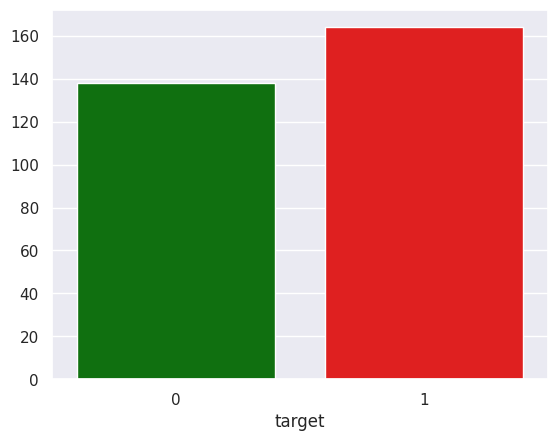

In [13]:
# Let's find out count of each class - Visually
sns.set(style='darkgrid')
colors = ['Green', 'Red']
sns.barplot(x=df['target'].value_counts().index, y=df['target'].value_counts().values, palette=colors);

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [15]:
for i in categorical_features[:8]:
    print(pd.crosstab(df['target'], df[i]))
    print("--"*25, '\n')

sex      0    1
target         
0       24  114
1       72   92
-------------------------------------------------- 

cp        0   1   2   3
target                 
0       104   9  18   7
1        39  41  68  16
-------------------------------------------------- 

fbs       0   1
target         
0       116  22
1       141  23
-------------------------------------------------- 

restecg   0   1  2
target            
0        79  56  3
1        68  95  1
-------------------------------------------------- 

exang     0   1
target         
0        62  76
1       141  23
-------------------------------------------------- 

slope    0   1    2
target             
0       12  91   35
1        9  49  106
-------------------------------------------------- 

ca        0   1   2   3  4
target                    
0        45  44  31  17  1
1       130  21   7   3  3
-------------------------------------------------- 

thal    0   1    2   3
target                
0       1  12   36  89
1       

### Heart Disease Frequency according to Sex
- For females (sex=0), there are 72 instances classified as having heart disease (target=1) and 24 instances classified as not having heart disease (target=0).
- For males (sex=1), there are 92 instances classified as having heart disease (target=1) and 114 instances classified as not having heart disease (target=0).

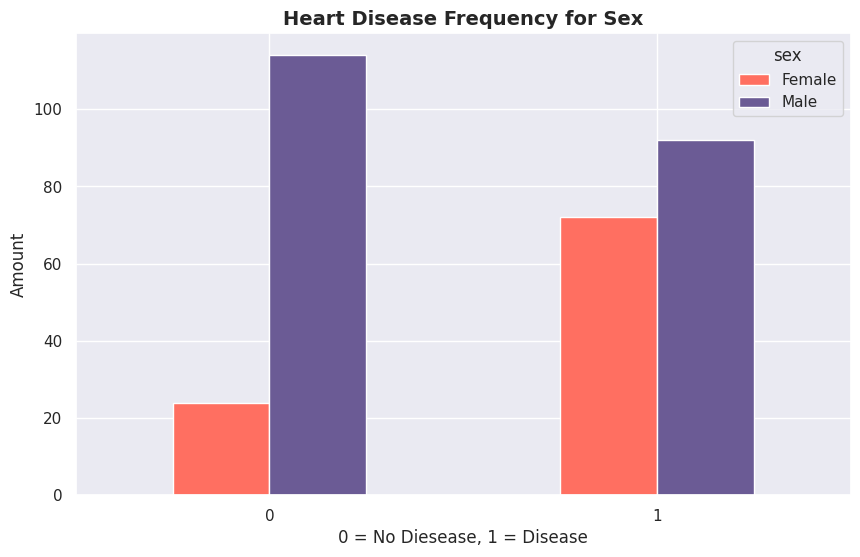

In [16]:
sns.set(style='darkgrid')
pd.crosstab(df['target'], df['sex']).plot.bar(figsize=(10, 6), color=["#FF6F61", "#6B5B95"])
plt.title("Heart Disease Frequency for Sex", fontsize=14, fontweight='bold')
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(title='sex', labels=['Female', 'Male'])
plt.xticks(rotation=0);

Upon analyzing the data, it was observed that a larger percentage of females in the dataset were found to be prone to heart disease compared to males. Specifically, **66.67% of females** were diagnosed with heart disease, whereas **44.68% of males** were diagnosed with the same condition. This finding suggests a potential gender-based difference in susceptibility to heart disease, warranting further investigation into the underlying factors contributing to this disparity.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


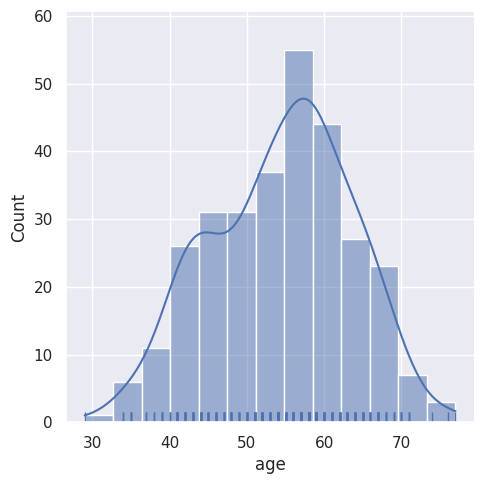

In [17]:
# Check the histogram distribution of Age
sns.displot(data=df, x='age', kde=True, rug=True);

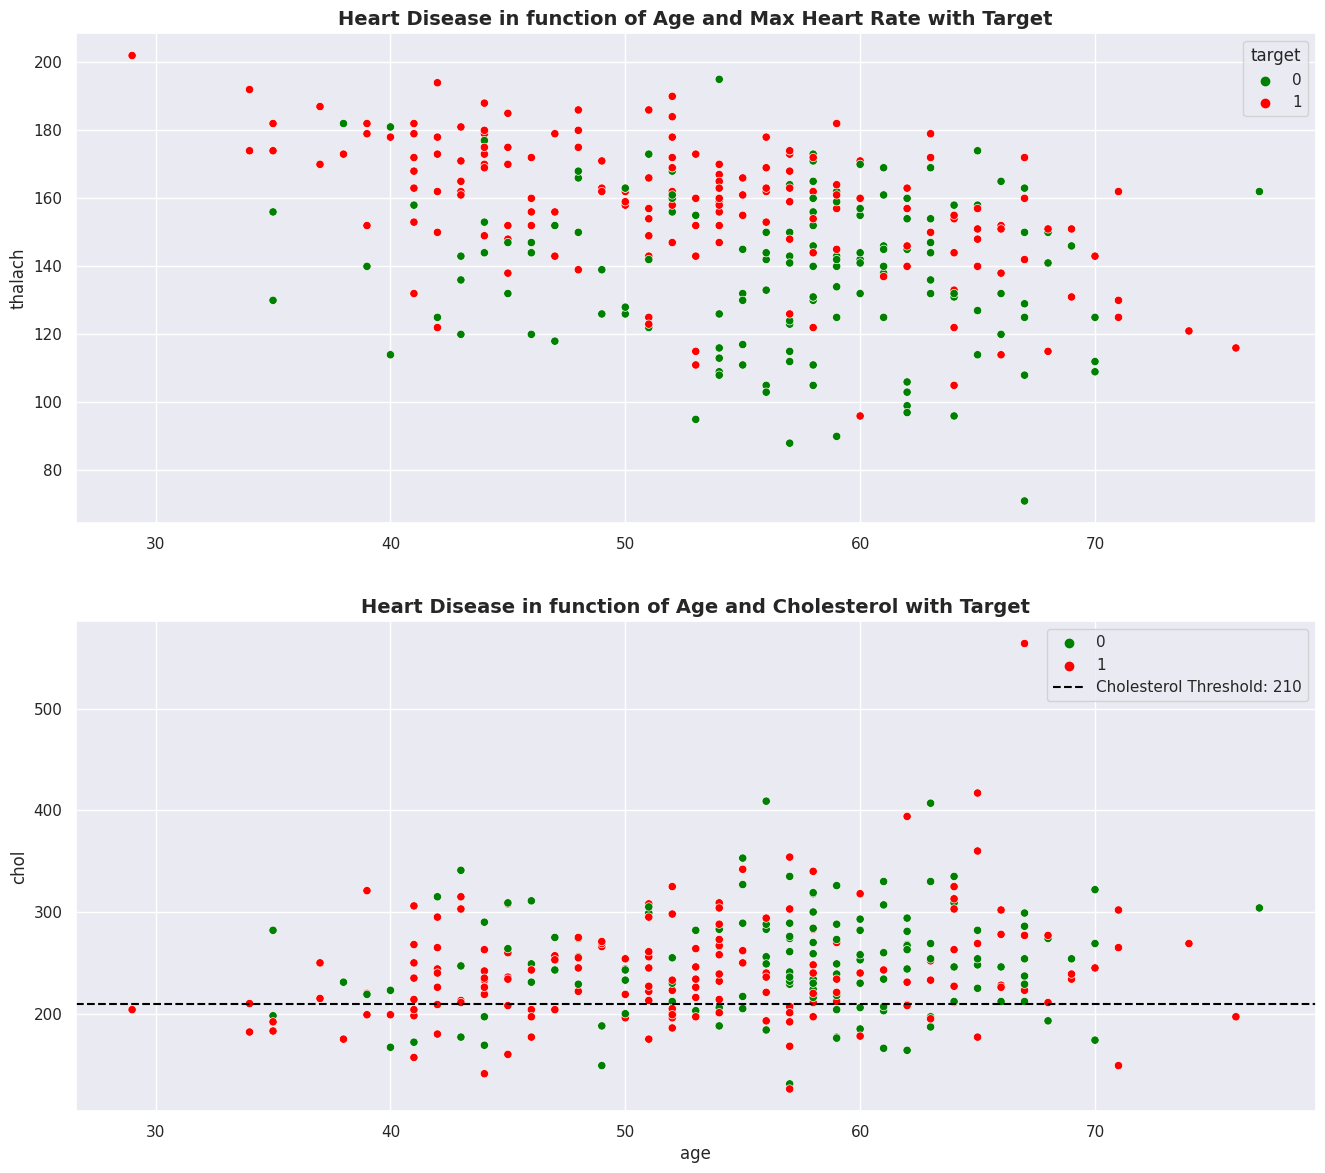

In [18]:
sns.set(style='darkgrid')
colors = ['Green', 'Red']
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,14))

sns.scatterplot(data=df, x='age', y='thalach', hue='target', ax=ax1, palette=colors)
ax1.set_title("Heart Disease in function of Age and Max Heart Rate with Target", fontsize=14, fontweight='bold')
ax1.set_xlabel('')

sns.scatterplot(data=df, x='age', y='chol', hue='target', ax=ax2, palette=colors)
ax2.set_title("Heart Disease in function of Age and Cholesterol with Target", fontsize=14, fontweight='bold')
ax2.axhline(y=210, linestyle='--', color='black', label='Cholesterol Threshold: 210')
ax2.legend()

plt.show()

Age is one of the most important risk factors in developing cardiovascular or heart diseases. From the data, we found that the older you get the less likely you will have a heart disease as shown in the plot. Certainly, the opposite is expected.

### Heart Disease Frequency per Chest Pain Type

**cp - chest pain type** 
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

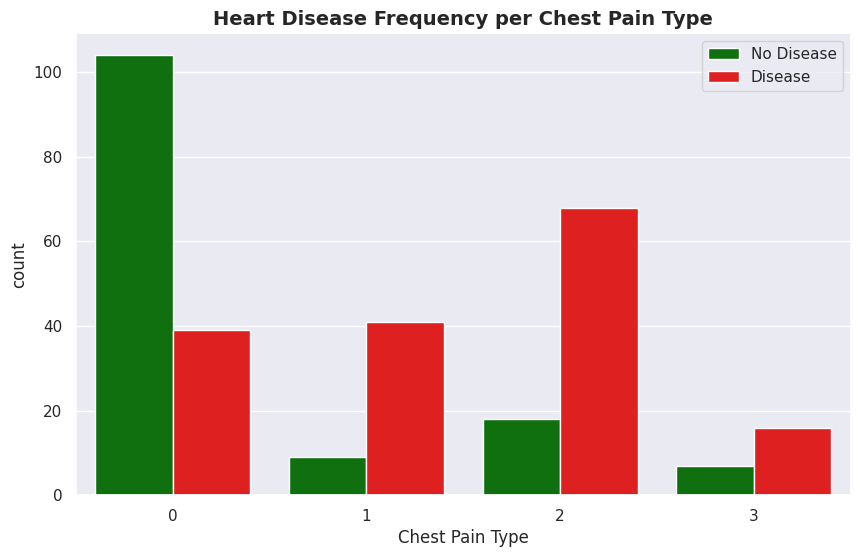

In [19]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.countplot(data=df, x='cp', hue='target', palette=colors)
plt.title("Heart Disease Frequency per Chest Pain Type", fontsize=14, fontweight='bold')
plt.xlabel("Chest Pain Type")
plt.legend(['No Disease','Disease'])
plt.show()

In [20]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [21]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


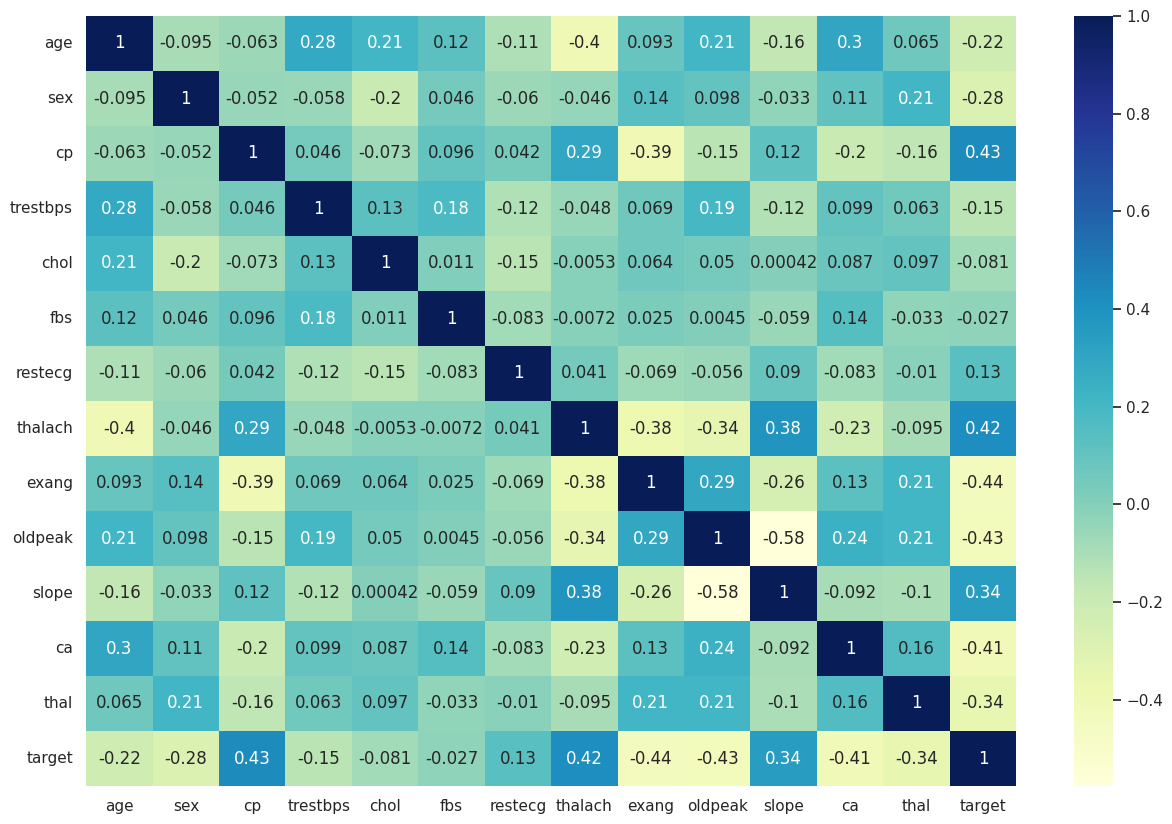

In [22]:
# Let's make our correlation matrix a little prettier
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt=".2g")
plt.show()

## 5. Modelling

In [23]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [24]:
# Convert categorical data to numeric data
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['cp'] = le.fit_transform(df['cp'])
df['fbs'] = le.fit_transform(df['fbs'])
df['restecg'] = le.fit_transform(df['restecg'])
df['exang'] = le.fit_transform(df['exang'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [25]:
X = df.drop('target',axis=1)
y = df['target']

In [26]:
scaler = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(scaler, columns=X.columns)
X_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.267966,0.682656,-0.935208,-0.376556,-0.667728,-0.418446,0.901657,0.806035,-0.698344,-0.037124,0.979514,1.274980,1.119967
1,-0.157260,0.682656,-0.935208,0.478910,-0.841918,2.389793,-1.002541,0.237495,1.431958,1.773958,-2.271182,-0.714911,1.119967
2,1.724733,0.682656,-0.935208,0.764066,-1.403197,-0.418446,0.901657,-1.074521,1.431958,1.342748,-2.271182,-0.714911,1.119967
3,0.728383,0.682656,-0.935208,0.935159,-0.841918,-0.418446,0.901657,0.499898,-0.698344,-0.899544,0.979514,0.280034,1.119967
4,0.839089,-1.464866,-0.935208,0.364848,0.919336,2.389793,0.901657,-1.905464,-0.698344,0.739054,-0.645834,2.269926,-0.513994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.503322,-1.464866,1.005911,-0.661712,-0.687083,-0.418446,-1.002541,-1.511859,-0.698344,0.394086,-0.645834,-0.714911,-0.513994
298,-1.153610,-1.464866,1.005911,-1.346085,-2.041893,-0.418446,0.901657,1.112172,-0.698344,-0.382092,-0.645834,-0.714911,-0.513994
299,-0.267966,0.682656,-0.935208,-0.205463,0.164513,-0.418446,0.901657,0.499898,1.431958,-0.899544,0.979514,0.280034,1.119967
300,0.506972,0.682656,1.976470,1.619532,0.512893,-0.418446,-1.002541,-1.074521,-0.698344,-0.899544,0.979514,-0.714911,-0.513994


In [27]:
X.shape, y.shape, X_scaled.shape

((302, 13), (302,), (302, 13))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Models that I am going to use:

    1. Logistic Regression
    2. KNeighbors Classifier
    3. RandomForest Classifier
    4. Support Vector Classifier
    5. LinearSVC
    6. Multinomial Naive Bayes
    7. Gaussian Naive Bayes

In [29]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNeighbors Classifier" : KNeighborsClassifier(),
    "RandomForest Classifier" : RandomForestClassifier(),
    "SVC" : SVC(),
    "Linear SVC" : LinearSVC(),
    "Multinomial Naive Bayes" : MultinomialNB(),
    "Gaussian Naive Bayes" : GaussianNB()
}

In [30]:
np.random.seed(42)
mean_scores = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    mean_scores[model_name] = np.mean(scores)
    print(f"{model_name}: {np.mean(scores)}\n")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.8444262295081966

KNeighbors Classifier: 0.6559562841530056

RandomForest Classifier: 0.8210928961748634

SVC: 0.6457377049180328

Linear SVC: 0.7160655737704917

Multinomial Naive Bayes: 0.7484153005464481

Gaussian Naive Bayes: 0.80775956284153



/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


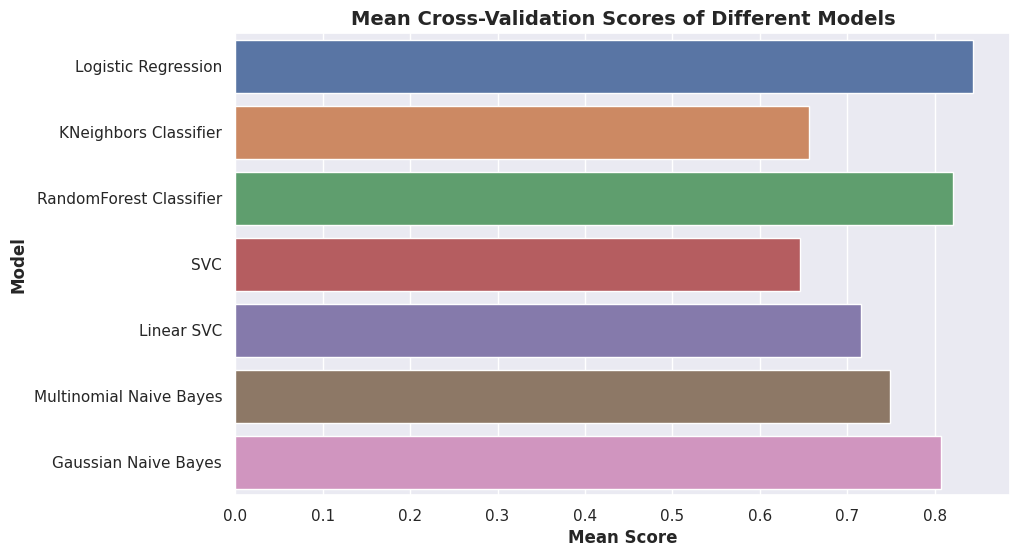

In [31]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(y=list(mean_scores.keys()), x=list(mean_scores.values()), orient='h')
plt.xlabel('Mean Score', fontweight='bold')
plt.ylabel('Model', fontweight='bold')
plt.title('Mean Cross-Validation Scores of Different Models', fontsize=14, fontweight='bold')
plt.show()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

   - Hyperparameter tuning
   - Feature importance
   - Confusion matrix
   - Cross-validation
   - Precision
   - Recall
   - F1 score
   - Classification report
   - ROC curve
   - Area under the curve (AUC)

### Hyperparameter tuning using `GridSearchCV`

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

The following models typically benefit from standard scaling:

    - Logistic Regression
    - KNeighbors Classifier
    - Support Vector Classifier (SVC)
    - LinearSVC

In [33]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_ss.shape, X_test_ss.shape, y_train_ss.shape, y_test_ss.shape

((241, 13), (61, 13), (241,), (61,))

### 1. Logistic Regression

In [34]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
lgr_param = {
    'C': list(np.logspace(-4, 4, 30)),
    'penalty': ['l1','l2'],
    'solver': ['liblinear','saga'],
    'max_iter': [1000, 5000],
    'multi_class': ['auto', 'ovr'],
    'random_state' : [42]
}

lgr_gridcv = GridSearchCV(LogisticRegression(), param_grid = lgr_param, cv=5)

In [36]:
import warnings

# Suppress specific warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="One or more of the test scores are non-finite")
    warnings.filterwarnings("ignore", message="Solver terminated early")
    
    # Your code here
    lgr_gridcv.fit(X_train_ss, y_train_ss)


In [37]:
lgr_gridcv.best_params_

{'C': 0.1082636733874054,
 'max_iter': 1000,
 'multi_class': 'auto',
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'saga'}

In [38]:
lgr_accuracy = lgr_gridcv.score(X_test_ss, y_test_ss)
print(f"Accuracy Score of LogisticRegression: {lgr_accuracy}")

Accuracy Score of LogisticRegression: 0.819672131147541


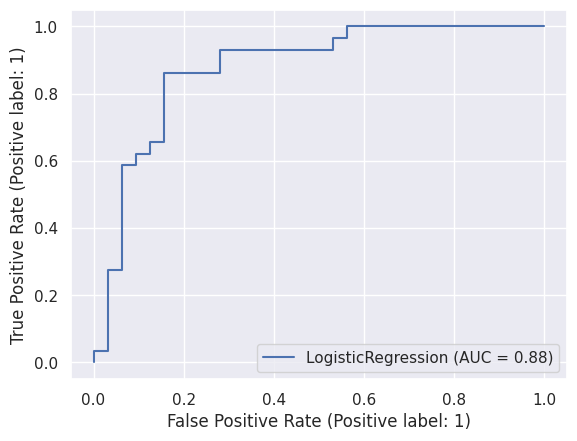

In [39]:
RocCurveDisplay.from_estimator(lgr_gridcv, X_test_ss, y_test_ss, name='LogisticRegression');

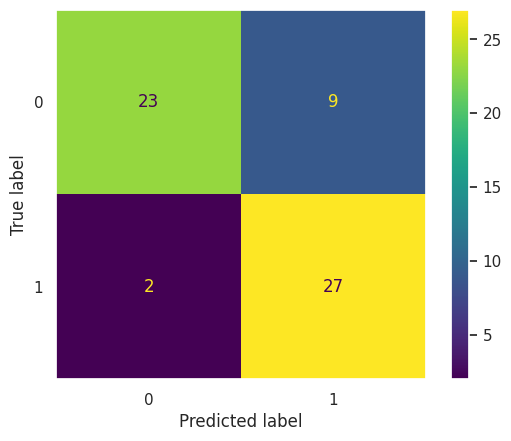

In [40]:
sns.set(style='dark')
ConfusionMatrixDisplay.from_predictions(y_test_ss, lgr_gridcv.predict(X_test_ss))
plt.show()

In [41]:
print(f"Classification Report of Logistic Regression: \n\n{classification_report(y_test_ss, lgr_gridcv.predict(X_test_ss))}")

Classification Report of Logistic Regression: 

              precision    recall  f1-score   support

           0       0.92      0.72      0.81        32
           1       0.75      0.93      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



### 2. KNeighbors Classifier

In [42]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [43]:
knn_param = {
    "n_neighbors" : [5, 10, 20],
    "weights" : ['uniform', 'distance'],
    "algorithm" : ['auto'],
    'metric' : ['minkowski'],
    'leaf_size' : [20, 30, 40],
    'p' : [1, 2]
}

knn_gridcv = GridSearchCV(KNeighborsClassifier(), param_grid = knn_param, cv=5)
knn_gridcv.fit(X_train_ss, y_train_ss)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [20, 30, 40],
                         'metric': ['minkowski'], 'n_neighbors': [5, 10, 20],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [44]:
knn_gridcv.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [45]:
knn_accuracy = knn_gridcv.score(X_test_ss, y_test_ss)
print(f"Accuracy Score of KNeighborsClassifier: {knn_accuracy}")

Accuracy Score of KNeighborsClassifier: 0.7868852459016393


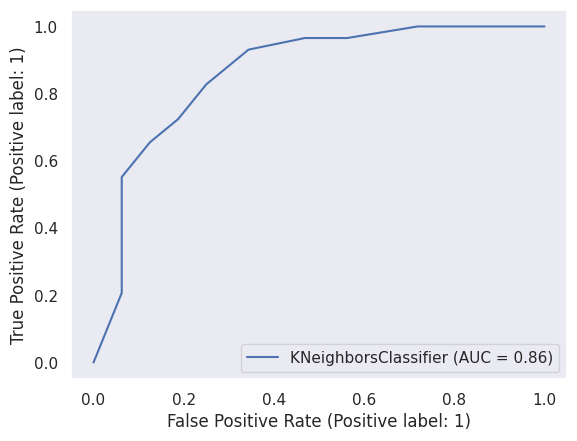

In [46]:
RocCurveDisplay.from_estimator(knn_gridcv, X_test_ss, y_test_ss, name='KNeighborsClassifier');

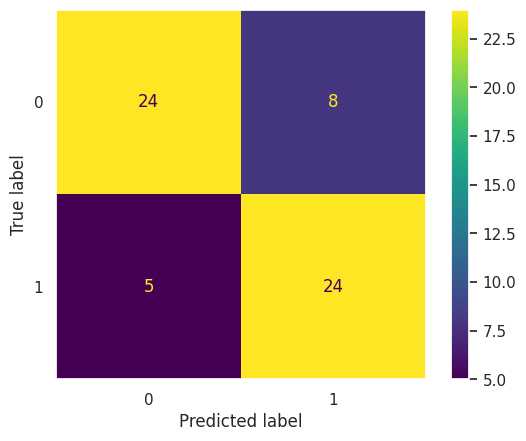

In [47]:
sns.set(style='dark')
ConfusionMatrixDisplay.from_predictions(y_test_ss, knn_gridcv.predict(X_test_ss))
plt.show()

In [48]:
print(f"Classification Report of KNeighborsClassifier: \n\n{classification_report(y_test_ss, knn_gridcv.predict(X_test_ss))}")

Classification Report of KNeighborsClassifier: 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



### 3. RandomForest Classifier

In [49]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
rf_param = {
    "n_estimators" : [50, 100, 150],
    "max_depth" : [None, 2],
    "max_features" : ['sqrt', 'log2'],
    "min_samples_leaf" : [1,5],
    "min_samples_split" : [2,4],
    "random_state" : [42],
    "n_jobs" : [-1]
}

rf_gridcv = GridSearchCV(RandomForestClassifier(), param_grid=rf_param, cv=5)
rf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150], 'n_jobs': [-1],
                         'random_state': [42]})

In [51]:
rf_gridcv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 42}

In [52]:
rf_accuracy = rf_gridcv.score(X_test, y_test)
print(f"Accuracy Score of RandomForestClassifier: {rf_accuracy}")

Accuracy Score of RandomForestClassifier: 0.819672131147541


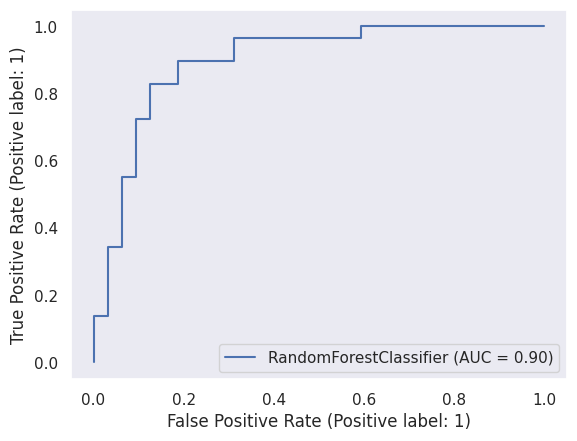

In [53]:
RocCurveDisplay.from_estimator(rf_gridcv, X_test, y_test,name="RandomForestClassifier");

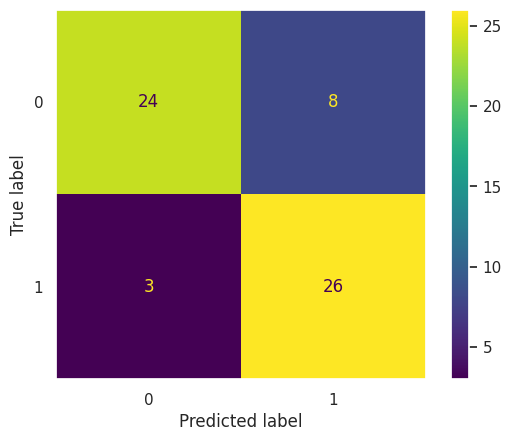

In [54]:
sns.set(style='dark')
ConfusionMatrixDisplay.from_predictions(y_test, rf_gridcv.predict(X_test));

In [55]:
print(f"Classification Report of RandomForestClassifier: \n\n{classification_report(y_test, rf_gridcv.predict(X_test))}")

Classification Report of RandomForestClassifier: 

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



### 4. SVC

In [56]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [57]:
svc_param = {
    "C" : list(np.logspace(-4, 4, 30)),
    "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
    "class_weight" : [None],
    "decision_function_shape" : ['ovo', 'ovr'],
    "gamma" : ['auto', 'scale'],
    'random_state' : [42]
}

svc_gridcv = GridSearchCV(SVC(), param_grid=svc_param, n_jobs=-1, cv=5)
svc_gridcv.fit(X_train_ss, y_train_ss)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.00018873918221350977,
                               0.0003562247890262444, 0.0006723357536499335,
                               0.0012689610031679222, 0.002395026619987486,
                               0.004520353656360241, 0.008531678524172805,
                               0.01610262027560939, 0.03039195382313198,
                               0.05736152510448681, 0.1082636733874054,
                               0.20433597178569418, 0.38566204211634725,
                               0.727895384...
                               9.236708571873866, 17.433288221999874,
                               32.90344562312671, 62.10169418915616,
                               117.21022975334793, 221.22162910704503,
                               417.53189365604004, 788.0462815669904,
                               1487.3521072935118, 2807.2162039411755,
                               5298.316906283702, 10000.0],
                         'class_weight': [None],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [42]})

In [58]:
svc_gridcv.best_params_

{'C': 0.008531678524172805,
 'class_weight': None,
 'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'linear',
 'random_state': 42}

In [59]:
svc_accuracy = svc_gridcv.score(X_test_ss, y_test_ss)
print(f"Accuracy Score of SVC: {svc_accuracy}")

Accuracy Score of SVC: 0.8032786885245902


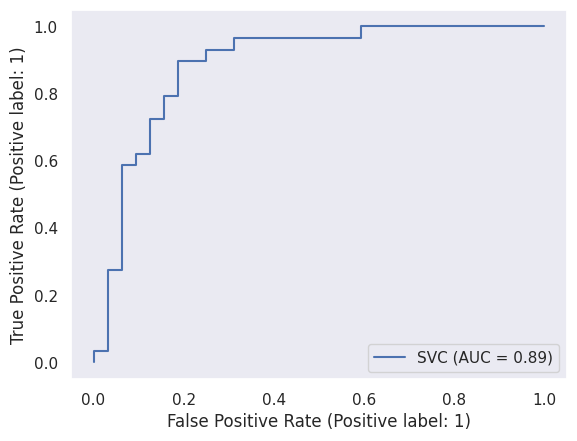

In [60]:
RocCurveDisplay.from_estimator(svc_gridcv, X_test_ss, y_test_ss, name="SVC");

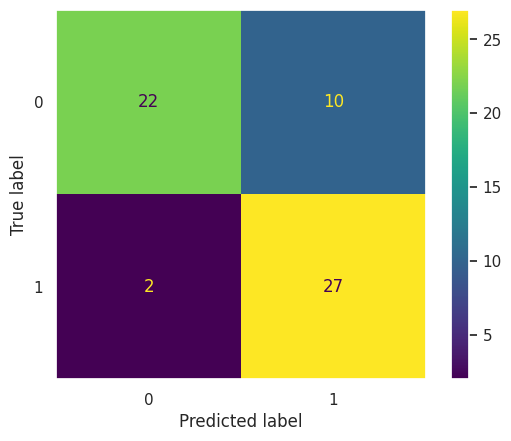

In [61]:
sns.set(style='dark')
ConfusionMatrixDisplay.from_predictions(y_test_ss, svc_gridcv.predict(X_test_ss));

In [62]:
print(f"Classification Report of SVC: \n\n{classification_report(y_test_ss, svc_gridcv.predict(X_test_ss))}")

Classification Report of SVC: 

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.73      0.93      0.82        29

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



### 5. Linear SVC

In [63]:
LinearSVC().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [64]:
lsvc_param = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "loss": ['hinge', 'squared_hinge'],
    "penalty": ['l1', 'l2'],
    'multi_class': ['ovr', 'crammer_singer'],
    "dual" : [True],
    'tol': list(np.logspace(-6, -2, 5)),
    'max_iter': [1000, 5000],
    'random_state': [42]
}


lsvc_gridcv = GridSearchCV(LinearSVC(), param_grid=lsvc_param, n_jobs=-1, cv=5)
lsvc_gridcv.fit(X_train_ss, y_train_ss)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True], 'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [1000, 5000],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2'], 'random_state': [42],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01]})

In [65]:
lsvc_gridcv.best_params_

{'C': 100,
 'dual': True,
 'loss': 'squared_hinge',
 'max_iter': 5000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 42,
 'tol': 1e-06}

In [66]:
lsvc_accuracy = lsvc_gridcv.score(X_test_ss, y_test_ss)
print(f"Accuracy Score of LinearSVC: {lsvc_accuracy}")

Accuracy Score of LinearSVC: 0.7704918032786885


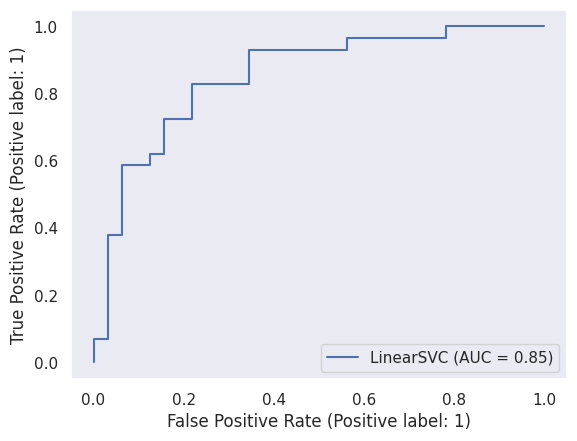

In [67]:
RocCurveDisplay.from_estimator(lsvc_gridcv, X_test_ss, y_test_ss, name="LinearSVC");

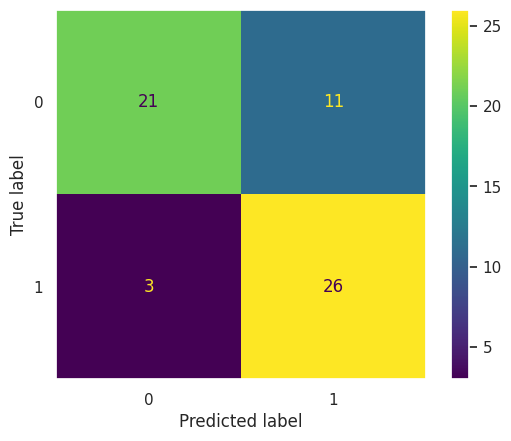

In [68]:
sns.set(style='dark')
ConfusionMatrixDisplay.from_predictions(y_test_ss, lsvc_gridcv.predict(X_test_ss));

In [69]:
print(f"Classification Report of LinearSVC: \n\n{classification_report(y_test_ss, lsvc_gridcv.predict(X_test_ss))}")

Classification Report of LinearSVC: 

              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



### 6. Multinomial Navie Bayes

In [70]:
MultinomialNB().get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [71]:
mnb_param = {
    "alpha" : [0.05, 0.1, 0.5, 1.0],
    "class_prior" : [None],
    "fit_prior" : [True]
}

mnb_gridcv = GridSearchCV(MultinomialNB(), param_grid=mnb_param, cv=5)
mnb_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.05, 0.1, 0.5, 1.0], 'class_prior': [None],
                         'fit_prior': [True]})

In [72]:
mnb_accuracy = mnb_gridcv.score(X_test, y_test)
print(f"Accuracy Score of MultinomialNB: {mnb_accuracy}")

Accuracy Score of MultinomialNB: 0.7377049180327869


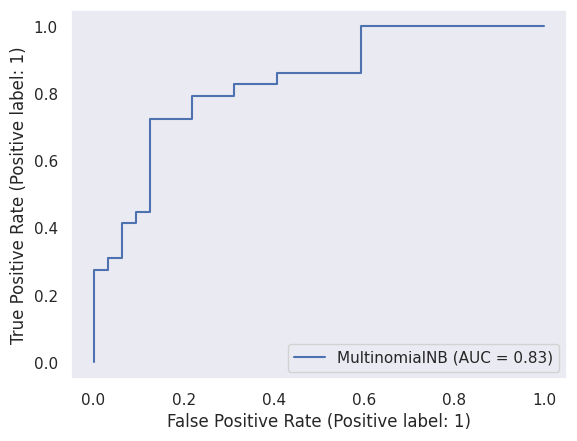

In [73]:
RocCurveDisplay.from_estimator(mnb_gridcv, X_test, y_test, name="MultinomialNB");

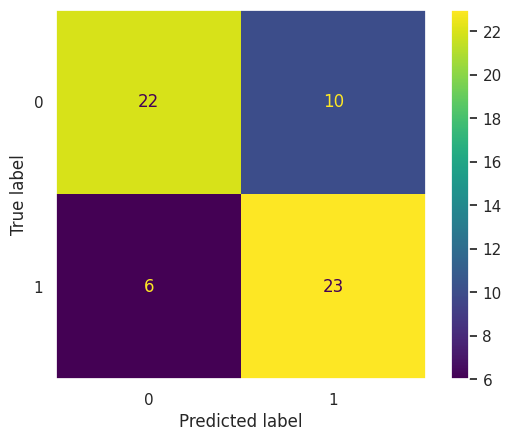

In [74]:
sns.set(style='dark')
ConfusionMatrixDisplay.from_predictions(y_test, mnb_gridcv.predict(X_test));

In [75]:
print(f"Classification Report of MultinomialNB: \n\n{classification_report(y_test, mnb_gridcv.predict(X_test))}")

Classification Report of MultinomialNB: 

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.70      0.79      0.74        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



### 7. Gaussian Navie Bayes

In [76]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [77]:
gnb_param = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]}

gnb_gridcv = GridSearchCV(GaussianNB(), param_grid=gnb_param, cv=5)
gnb_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06]})

In [78]:
gnb_accuracy = gnb_gridcv.score(X_test, y_test)
print(f"Accuracy Score of GaussianNB: {gnb_accuracy}")

Accuracy Score of GaussianNB: 0.8524590163934426


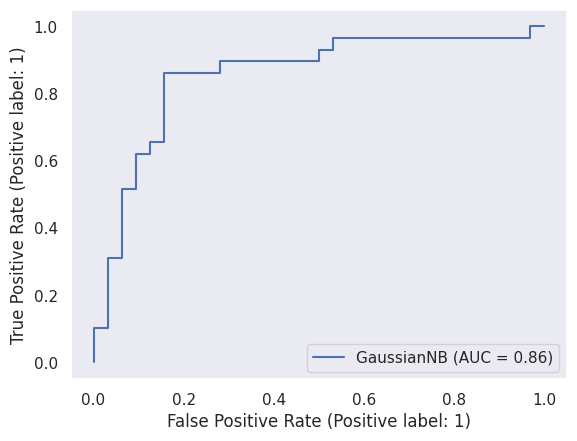

In [79]:
RocCurveDisplay.from_estimator(gnb_gridcv, X_test, y_test, name="GaussianNB");

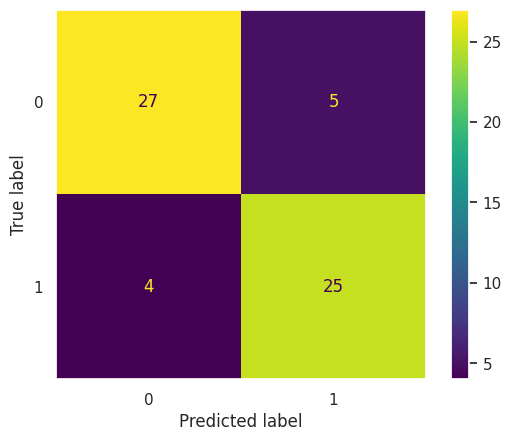

In [80]:
sns.set(style='dark')
ConfusionMatrixDisplay.from_predictions(y_test, gnb_gridcv.predict(X_test));

In [81]:
print(f"Classification Report of GaussianNB: \n\n{classification_report(y_test, gnb_gridcv.predict(X_test))}")

Classification Report of GaussianNB: 

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [82]:
overall_accuracy_models = {
    "Logistic Regression" : lgr_accuracy,
    "KNeighbors Classifier" : knn_accuracy,
    "RandomForest Classifier" : rf_accuracy,
    "SVC" : svc_accuracy,
    "Linear SVC" : lsvc_accuracy,
    "Multinomial Naive Bayes" : mnb_accuracy,
    "Gaussian Naive Bayes" : gnb_accuracy
}

In [83]:
overall_accuracy_models

{'Logistic Regression': 0.819672131147541,
 'KNeighbors Classifier': 0.7868852459016393,
 'RandomForest Classifier': 0.819672131147541,
 'SVC': 0.8032786885245902,
 'Linear SVC': 0.7704918032786885,
 'Multinomial Naive Bayes': 0.7377049180327869,
 'Gaussian Naive Bayes': 0.8524590163934426}

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


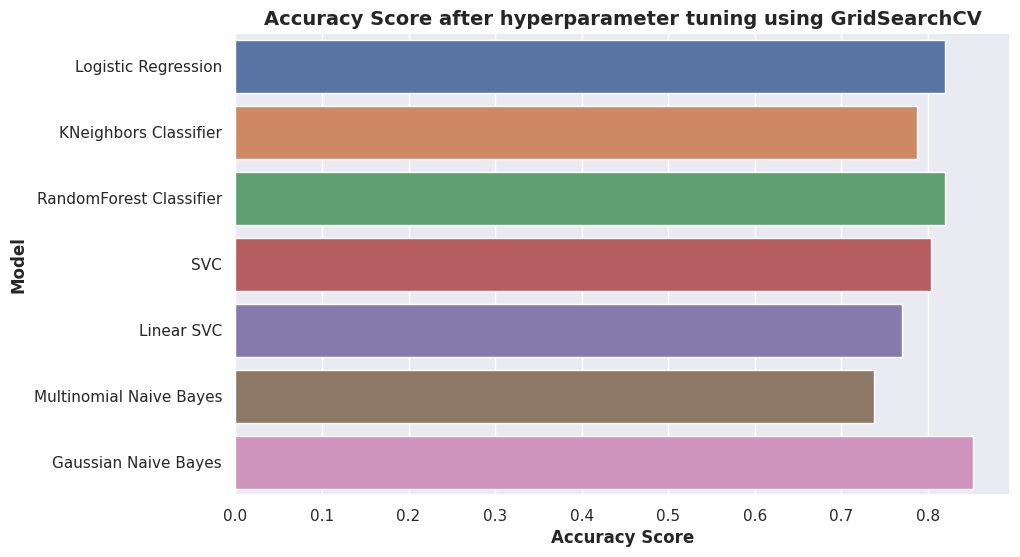

In [84]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(y=list(overall_accuracy_models.keys()), x=list(overall_accuracy_models.values()), orient='h')
plt.title("Accuracy Score after hyperparameter tuning using GridSearchCV", fontsize=14, fontweight='bold')
plt.xlabel('Accuracy Score', fontweight='bold')
plt.ylabel('Model', fontweight='bold')
plt.show()

In [85]:
classification_reports = {
    'Logistic Regression': classification_report(y_test_ss, lgr_gridcv.predict(X_test_ss)),
    'KNeighbors Classifier': classification_report(y_test_ss, knn_gridcv.predict(X_test_ss)),
    'RandomForest Classifier': classification_report(y_test, rf_gridcv.predict(X_test)),
    'SVC': classification_report(y_test_ss, svc_gridcv.predict(X_test_ss)),
    'Linear SVC': classification_report(y_test_ss, lsvc_gridcv.predict(X_test_ss)),
    'Multinomial Naive Bayes': classification_report(y_test, mnb_gridcv.predict(X_test)),
    'Gaussian Naive Bayes': classification_report(y_test, gnb_gridcv.predict(X_test))
}

for model, d in classification_reports.items():
    print(model+":","\n")
    print(d)
    print("---" * 18)

Logistic Regression: 

              precision    recall  f1-score   support

           0       0.92      0.72      0.81        32
           1       0.75      0.93      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61

------------------------------------------------------
KNeighbors Classifier: 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

------------------------------------------------------
RandomForest Classifier: 

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        2

In [86]:
# Match coef's of features to columns
clf = LogisticRegression()
clf.fit(X_train_ss, y_train_ss)

LogisticRegression()

In [87]:
clf.coef_

array([[-0.06493201, -0.85443331,  1.00899547, -0.56509111, -0.08713836,
        -0.04605467,  0.49089671,  0.47555111, -0.2753179 , -0.81581397,
         0.34313602, -0.57934898, -0.39001871]])

In [88]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.06493200759020051,
 'sex': -0.8544333083564535,
 'cp': 1.0089954716358636,
 'trestbps': -0.5650911080278929,
 'chol': -0.08713836024679128,
 'fbs': -0.046054667975215444,
 'restecg': 0.49089671133759805,
 'thalach': 0.475551113836272,
 'exang': -0.2753178964368897,
 'oldpeak': -0.8158139666442253,
 'slope': 0.3431360161763376,
 'ca': -0.5793489766856535,
 'thal': -0.39001871194760807}

- By matching the coefficients to the columns of your dataset, you can understand which features are having a stronger influence on the model's predictions.
- This dictionary allows you to easily inspect the weight of each feature. Features with higher absolute coefficients are considered more important in the prediction process. Positive coefficients indicate that increasing the value of that feature increases the likelihood of the positive class, while negative coefficients suggest the opposite.

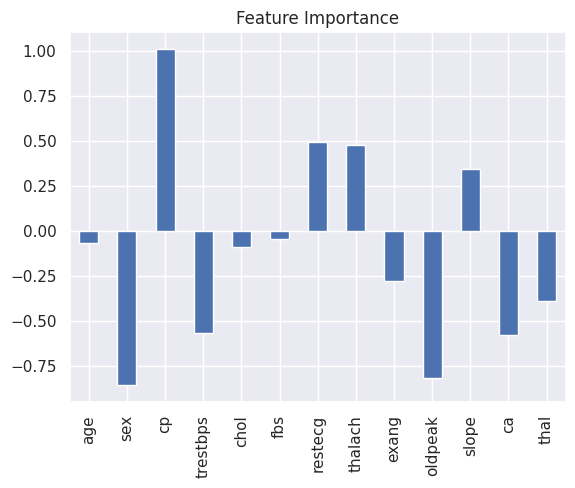

In [89]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [90]:
overall_accuracy_models

{'Logistic Regression': 0.819672131147541,
 'KNeighbors Classifier': 0.7868852459016393,
 'RandomForest Classifier': 0.819672131147541,
 'SVC': 0.8032786885245902,
 'Linear SVC': 0.7704918032786885,
 'Multinomial Naive Bayes': 0.7377049180327869,
 'Gaussian Naive Bayes': 0.8524590163934426}

### Improving Model Performance
1. **Data Quantity**: Collect more data to reduce overfitting and improve generalization.

2. **Data Quality**: Ensure data cleanliness by addressing outliers and inconsistencies. Consult domain experts to understand the nature of outliers for better handling.

3. **Feature Selection**: Identify and remove irrelevant features to simplify the model and reduce overfitting. Consult domain experts to determine the relevance of extra data columns or the removal of unnecessary ones.

4. **Advanced Algorithms**: Explore advanced machine learning algorithms like gradient boosting (such as CatBoost or XGBoost) or neural networks to potentially improve performance further.

Considering the scores:
- Among the models tested, the **Gaussian Naive Bayes** model performed the best with an accuracy of **85.25%**.


## Feedback Welcome:
I welcome any feedback on the project, as it will greatly contribute to my ongoing learning journey. Feel free to point out errors, suggest improvements. **:)**